# Taller-2 Corte-2 : 23-nov-2023

# Presentado por :

# Janerson Cortés
# Andrés Marín
# Carlos Quintero

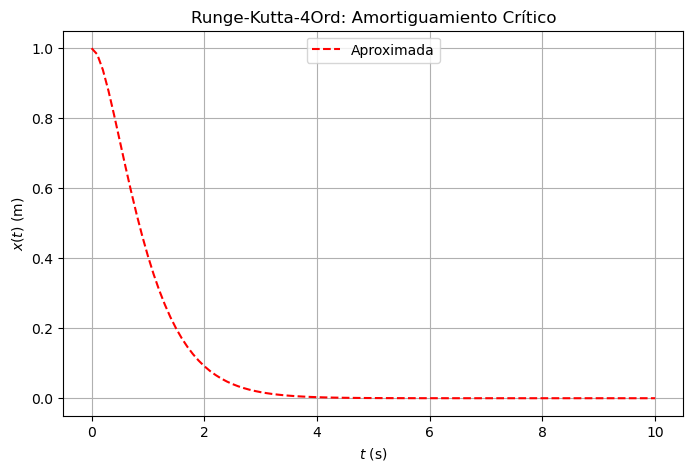

In [33]:
# Usando GAMMA-CRITICO
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('seaborn-poster')
%matplotlib inline

F1_oa = lambda t, v_oa, x_oa, gamma_critico, omega_0: -gamma_critico*v_oa-pow(omega_0,2)*x_oa
t=0
h = 0.1 # Step size
t = np.arange(0, 10 + h, h) # Numerical grid

# Initial Conditions
x0_oa = 1 # Posicion(0)=1
v0_oa = 0 # Velocidad(0) = 0
omega_0 = 2 # Constante Omega_0 = 0
gamma_critico = 2*omega_0 # Gamma Crítico = 2xomega_0
#gamma_debil = 0.1*omega_0 # Gamma Débil = 1xomega_0

x_oa = np.zeros(len(t)) # Crea vector para valores de X
v_oa = np.zeros(len(t)) # Crea vector para valores de V

x_oa[0] = x0_oa #inicializa vector posicion con condicion inicial
v_oa[0] = v0_oa #inicializa vector velocidad con condicion inicial

# Método Runge-Kutta : Calcula las constantes Ki para V y X
for i in range(0, len(t) - 1): 
    k1v = h*F1_oa(t[i], v_oa[i], x_oa[i], gamma_critico, omega_0)
    k1x = h*v_oa[i]
    k2v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k1v, x_oa[i] + 0.5*k1x, gamma_critico, omega_0)
    k2x = h*(v_oa[i] + 0.5*k1v)
    k3v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k2v, x_oa[i] + 0.5*k2x, gamma_critico, omega_0)
    k3x = h*(v_oa[i] + 0.5*k2v)
    k4v = h*F1_oa(t[i] + h, v_oa[i] + k3v, x_oa[i] + k3x, gamma_critico, omega_0)
    k4x = h*(v_oa[i] + k3v)
    
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (8, 5))
plt.plot(t, x_oa, 'r--', label='Aproximada')
#plt.plot(t, x0_oa*np.exp(-gamma_critico*t)*np.sin(np.sqrt(pow(omega_0,2)+pow(gamma_critico,2))*t), color = 'black', label='Exacta')
plt.title('Runge-Kutta-4Ord: Amortiguamiento Crítico')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')
plt.show()

In [19]:
np.sin(np.sqrt(pow(omega_0,2)+pow(gamma_critico,2)))

-0.9712777989606532

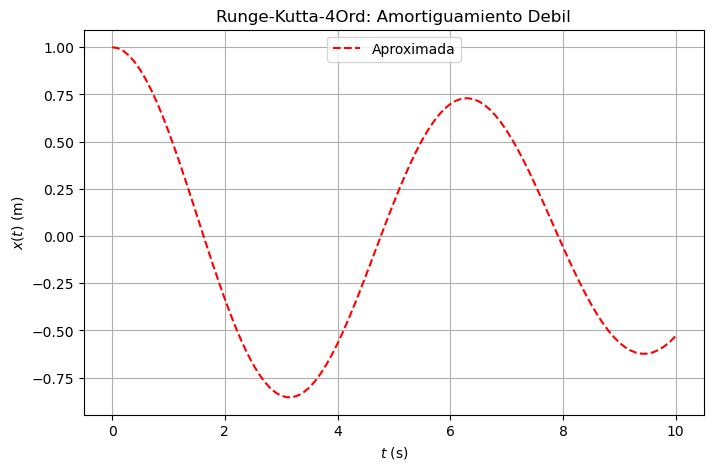

In [34]:
# Usando GAMMA-DEBIL
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('seaborn-poster')
%matplotlib inline

F1_oa = lambda t, v_oa, x_oa, gamma_debil, omega_0: -gamma_debil*v_oa-pow(omega_0,2)*x_oa

h = 0.1 # Step size
t = np.arange(0, 10 + h, h) # Numerical grid

# Initial Conditions
x0_oa = 1 # Posicion(0)=1
v0_oa = 0 # Velocidad(0) = 0
omega_0 = 1 # Constante Omega_0 = 0
gamma_critico = 2*omega_0 # Gamma Crítico = 2xomega_0
gamma_debil = 0.1*omega_0 # Gamma Débil = 1xomega_0

x_oa = np.zeros(len(t)) # Crea vector para valores de X
v_oa = np.zeros(len(t)) # Crea vector para valores de V

x_oa[0] = x0_oa #inicializa vector posicion con condicion inicial
v_oa[0] = v0_oa #inicializa vector velocidad con condicion inicial

# Método Runge-Kutta : Calcula las constantes Ki para V y X
for i in range(0, len(t) - 1): 
    k1v = h*F1_oa(t[i], v_oa[i], x_oa[i], gamma_debil, omega_0)
    k1x = h*v_oa[i]
    k2v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k1v, x_oa[i] + 0.5*k1x, gamma_debil, omega_0)
    k2x = h*(v_oa[i] + 0.5*k1v)
    k3v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k2v, x_oa[i] + 0.5*k2x, gamma_debil, omega_0)
    k3x = h*(v_oa[i] + 0.5*k2v)
    k4v = h*F1_oa(t[i] + h, v_oa[i] + k3v, x_oa[i] + k3x, gamma_debil, omega_0)
    k4x = h*(v_oa[i] + k3v)
    
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (8, 5))
plt.plot(t, x_oa, 'r--', label='Aproximada')
#plt.plot(t, x0_oa*np.exp(-gamma_debil*t)*np.sin(np.sqrt(pow(omega_0,2)+pow(gamma_debil,2)))*t, color = 'black', label='Exacta')
plt.title('Runge-Kutta-4Ord: Amortiguamiento Debil')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')
plt.show()